In [9]:
# Puzzle 1:

import pandas as pd

def omghCheck(data, indexShoro):
    if data[indexShoro] > data[indexShoro - 1]:
        answer = 1
    else: answer = 0
    return answer

def setaYeki(data, indexShoro, javab):
    if javab == None:
        javab = []
    if indexShoro < len(data) - 2:
        javab.append(data[indexShoro] + data[indexShoro + 1] + data[indexShoro + 2])
    else:
        return javab
    return setaYeki(data, indexShoro + 1, javab)

a = open('data/puzzle1.txt','r').read().split('\n')
a = [int(s) for s in a]
javab = 0
for i in range(len(a) - 1):
    answer = omghCheck(a, i + 1)
    javab += answer
print('Part 1 answer is: ', javab)

javab2 = setaYeki(a,0,None)

boob = 0
for i in range(len(javab2) - 1):
    answer = omghCheck(javab2, i + 1)
    boob += answer

boob

print('Part 2 answer is: ', boob)

Part 1 answer is:  1448
Part 2 answer is:  1471


In [38]:
# Puzzle 2!

instructions = open('data/puzzle2.txt','r').read().split('\n')
instructions = [s.split(' ') for s in instructions]
instructions = pd.DataFrame(instructions)
instructions.columns = instructions.iloc[0]
instructions = instructions.drop(0).reset_index(drop=True)
instructions['amount'] = instructions['amount'].apply(lambda x: int(x))

forward = 0
depth = 0

for i in range(len(instructions)):
    if instructions.iloc[i]['direction'] == 'forward':
        forward = forward + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'down':
        depth = depth + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'up':
        depth = depth - instructions.iloc[i]['amount']

print(f'Part 1 horizental postion is {forward} and depth is {depth} and answer is {forward * depth}')

aim = 0
depth= 0

for i in range(len(instructions)):
    if instructions.iloc[i]['direction'] == 'forward':
        depth = depth + aim * instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'down':
        aim = aim + instructions.iloc[i]['amount']
    if instructions.iloc[i]['direction'] == 'up':
        aim = aim - instructions.iloc[i]['amount']

print(f'Part 2 depth is {depth} and answer is {2105 * depth}')

Part 1 horizental postion is 2105 and depth is 807 and answer is 1698735
Part 2 depth is 757618 and answer is 1594785890


In [39]:
# Puzzle 3!

import pandas as pd
from copy import deepcopy

def tedadShomar(data, jaygah):
    temp = deepcopy(data)
    tedad = len(temp)
    tedadyek = 0
    for n in range(tedad):
        tedadyek = tedadyek + int(temp.iloc[n][0][jaygah])
    return tedadyek

def tedadShomarlist(data, jaygah):
    temp = deepcopy(data)
    tedad = len(temp)
    tedadyek = 0
    for n in range(tedad):
        tedadyek = tedadyek + int(temp[n][jaygah])
    return tedadyek

def gammaYab(data):
    ragham = len(data.iloc[0][0])
    tedad = len(data)
    gamma = 0
    for i in range(ragham):
        temp = 0
        for n in range(tedad):
            temp = temp + int(data.iloc[n][0][i])
        if temp > 500:
            gamma = gamma + 10 ** (ragham - i - 1)
    return gamma

def epsilonYab(gamma, ragham):
    adad = 0
    for i in range(ragham):
        adad += 10 ** i
    epsilon = adad - gamma
    return epsilon

def fuel(x, y):
    x = int(str(x),2)
    y = int(str(y),2)
    return x * y


def main():
    f = open('data/puzzle3.txt', 'r')
    data = f.read().split('\n')
    data = pd.DataFrame(data)

    gamma = gammaYab(data)
    epsilon = epsilonYab(gamma, 12)

    javab1 = fuel(epsilon, gamma)

    listOxy = []
    listCo = []

    tedad = len(data)
    tedadyek = tedadShomar(data, 0)
    if tedadyek >= 500:
        for n in range(tedad):
            if data.iloc[n][0][0] == '1':
                listOxy.append(data.iloc[n][0])
            else: listCo.append(data.iloc[n][0])
    elif tedadyek < 500:
        for n in range(tedad):
            if data.iloc[n][0][0] == '0':
                listOxy.append(data.iloc[n][0])
            else: listCo.append(data.iloc[n][0])

    for i in range(11):
        tedadyek = tedadShomarlist(listOxy, i + 1)
        if len(listOxy) == 1:
            break
        x = 0
        if tedadyek >= len(listOxy) / 2:
            for n in range(len(listOxy)):
                if listOxy[n - x][i + 1] == '0':
                    listOxy.pop(n - x)
                    x += 1
        else:
            for n in range(len(listOxy)):
                if listOxy[n - x][i + 1] == '1':
                    listOxy.pop(n - x)
                    x += 1

    for i in range(11):
        tedadyek = tedadShomarlist(listCo, i + 1)
        if len(listCo) == 1:
            break
        x = 0
        if tedadyek < len(listCo) / 2:
            for n in range(len(listCo)):
                if listCo[n - x][i + 1] == '0':
                    listCo.pop(n - x)
                    x += 1
        else:
            for n in range(len(listCo)):
                if listCo[n - x][i + 1] == '1':
                    listCo.pop(n - x)
                    x += 1

    javab2 = int(listOxy[0],2) * int(listCo[0],2)
    print(f'javab 1 is: {javab1}\njavab 2 is: {javab2}')

main()

javab 1 is: 741950
javab 2 is: 903810


In [42]:
# Puzzle 4!

import pandas as pd

def boardYab(boards):
    n = 0
    board = []
    tedadBoards = int((len(boards) + 1)/6)
    for i in range(tedadBoards):
        board.append([boards[5 * i + n],boards[5*i +1+n], boards[5 * i + 2+n],
                        boards[5*i+3+n],boards[5*i+4+n]])
        n += 1
    return board

def stringToNumber(boards):
    tedadBoards = len(boards)
    tedadRadif = len(boards[0])
    for i in range(tedadBoards):
        for n in range(tedadRadif):
            boards[i][n] = boards[i][n].split(' ')
            tedadChar = len(boards[i][n])
            if tedadChar > 5:
                x = 0
                for m in range(tedadChar):
                    if boards[i][n][m - x] == '':
                        boards[i][n].pop(m - x)
                        x += 1
            boards[i][n] = [int(s) for s in boards[i][n]]
    return boards

def checkBoards(boards, number):
    for i in range(len(boards)):
        for n in range(5):
            for m in range(5):
                if boards[i][n][m] == number:
                   boards[i][n][m] = -1 

def checkForWinner(boards):
    # check every row
    for i in range(len(boards)):
        for n in range(len(boards[i])):
            if boards[i][n][0] == -1 and boards[i][n][1] == -1 and boards[i][n][2] == -1 and boards[i][n][3] == -1 and boards[i][n][4] == -1:
                # print('We have a winner!!!')
                return i
        for m in range(5):
            if boards[i][0][m] == -1 and boards[i][1][m] == -1 and boards[i][2][m] == -1 and boards[i][3][m] == -1 and boards[i][4][m] == -1:
                # print('We have a winner!!!')
                return i
    return -1

def bingo(boards, numbers):
    winnerID = -1
    # winners = []
    for i in range(len(numbers)):
        checkBoards(boards, numbers[i])
        # print(numbers[i])
        if i > 4:
            # print(numbers[i])
            for x in range(5):
                winnerID = checkForWinner(boards)
                if len(boards) == 1 and winnerID != -1:
                    print('We have a looser!!!')
                    return boards[0], i
                if winnerID != -1:
                    # winners.append(winnerID)
                    boards.pop(winnerID)
                    # print(len(boards))
            
def calcScore(board, number):
    sum = 0
    for i in range(5):
        for n in range(5):
            if board[i][n] != -1:
                sum += board[i][n]
    # print(sum, number)
    score = sum * number
    return score

# def main():
f = open('data/puzzle4.txt', 'r')
data = f.read().split('\n')
numbers = data[0]
numbers = [int(s) for s in numbers.split(',')]
boards = data[2:]
boards = stringToNumber(boardYab(boards))
board, numberID = bingo(boards, numbers)
score = calcScore(board, numbers[numberID])
score
#main()

We have a looser!!!


1827

In [1]:
# Puzzle 5!

from copy import deepcopy
import numpy as np

def straightLineCheck(pointList):
    x = 0
    straightList = deepcopy(pointList)
    for i in range(len(straightList)):
        if straightList[i - x][0][0] != straightList[i - x][1][0] and straightList[i - x][0][1] != straightList[i - x][1][1]:
            straightList.pop(i - x)
            x += 1
    return straightList

def naghsheKesh(naghshe, lineList):
    for i in range(len(lineList)):
        if lineList[i][0][0] == lineList[i][1][0]:
            a = lineList[i][0][1]
            b = lineList[i][1][1]
            if a > b:
                c = a
                a = b
                b = c
            for n in range(b - a + 1):
                naghshe[lineList[i][0][0]][a + n] += 1
        elif lineList[i][0][1] == lineList[i][1][1]:
            a = lineList[i][0][0]
            b = lineList[i][1][0]
            if a > b:
                c = a
                a = b
                b = c
            for n in range(b - a + 1):
                naghshe[a + n][lineList[i][0][1]] += 1
        else:
            xA = lineList[i][0][0]
            xB = lineList[i][1][0]
            yA = lineList[i][0][1]
            yB = lineList[i][1][1]
            if xA > xB:
                c = xA
                d = yA
                xA = xB
                yA = yB
                xB = c
                yB = d
            for n in range(xB - xA + 1):
                if yB > yA:
                    naghshe[xA + n][yA + n] += 1
                else:
                    naghshe[xA + n][yA - n] += 1
    return naghshe

def danger(naghshe):
    danger = 0
    for i in range(len(naghshe)):
        for n in range(len(naghshe[i])):
            if naghshe[i][n] > 1:
                danger += 1
    return danger

f = open('data/puzzle5.txt', 'r')
data = [s.split(' -> ') for s in f.read().split('\n')]
for i in range(len(data)):
    data[i] = [s.split(',') for s in data[i]]
    for n in range(len(data[i])):
        data[i][n] = [int(s) for s in data[i][n]]
lineList = straightLineCheck(data)
naghshe = np.zeros((1000,1000), dtype = int)
naghshe = naghsheKesh(naghshe, lineList)
answer1 = danger(naghshe)

naghshe2 = np.zeros((1000,1000), dtype = int)
naghshe2 = naghsheKesh(naghshe2, data)
answer2 = danger(naghshe2)

print(answer1, answer2)


4728 17717


In [11]:
# puzzle 6 with lists!
# this works fine for part 1 with only 80 days
# but for part to it took 34 minutes to reach a memory error!
# not recommended

f = open('data/puzzle6.txt', 'r')
data = [int(s) for s in f.read().split(',')]
numberOfDays = 80
for i in range(numberOfDays):
    for n in range(len(data)):
        if data[n] == 0:
            data.append(8)
            data[n] = 6
        else:
            data[n] -= 1

len(data)

375482

In [31]:
def tedadBacheHesabKon(age, numberOfDays):
    if numberOfDays < 7:
        total = 0
        return total
    # tedad bache ha ye mahi aval ro hesab mikone
    total = int((numberOfDays - age) / 7)
    # bara ye har kodom az bache ha tedad bachehashon ro hesab mikone
    for i in range(total):
        total += tedadBacheHesabKon(8, numberOfDays - (i * 7))
    return total


f = open('data/puzzle6.txt', 'r')
data = [int(s) for s in f.read().split(',')]
numberOfDays = 80
a = tedadBacheHesabKon(7, 10)
a

0

In [1]:
# not my answer sadly!

from collections import Counter

def part1(fishes):
    for day in range(80):
        for idx, fish in enumerate(fishes):
            if fish == 0:
                fishes[idx] = 7
                fishes.append(9)
        fishes = [fish - 1 for fish in fishes]
    return len(fishes)

def part2(fishes):
    timers = Counter({timer: 0 for timer in range(10)})
    fishes = Counter(fishes)
    fishes.update(timers)
    
    for day in range(256):
        fishes[7] += fishes.get(0, 0)
        fishes[9] += fishes.get(0, 0)
        fishes = {fish: fishes.get(fish + 1, 0) for fish in fishes}
        
    return sum(fishes.values())

def main():
    with open("data/puzzle6.txt") as f:
        fishes = f.read().strip().split(',')
        fishes = list(map(int, fishes))
        
    print(f"Part 1 Answer: {part1(fishes)}")
    print(f"Part 2 Answer: {part2(fishes)}")

if __name__ == "__main__":
    main()

Part 1 Answer: 375482
Part 2 Answer: 1689540415957


In [10]:
# Puzzle 7 part 1

def fuelCost(positions, goal):
    fuel = 0
    for i in range(len(positions)):
        fuel += abs(positions[i] - goal)
    return fuel

def optimizer(data, initialGoal):
    # decide on direction
    a = fuelCost(data, initialGoal)
    b = fuelCost(data, initialGoal - 1)
    c = fuelCost(data, initialGoal + 1)
    if a > b:
        for i in range(initialGoal - 1):
            b = fuelCost(data, initialGoal - 1 - i)
            d = fuelCost(data, initialGoal - 2 - i)
            if d > b:
                return b
    else:
        for i in range(initialGoal - 1):
            c = fuelCost(data, initialGoal + 1 + i)
            d = fuelCost(data, initialGoal + 2 + i)
            if d > c:
                return c

f = open('data/puzzle7.txt', 'r')
data = [int(s) for s in f.read().split(',')]
initialGoal = int(sum(data) / len(data))
fuel = optimizer(data, initialGoal)
fuel

345197

In [18]:
# Puzzle 7 part 2

def fuelCost(positions, goal):
    fuel = 0
    for i in range(len(positions)):
        fasele = abs(positions[i] - goal)
        fuelYeki = (fasele + 1) * fasele / 2
        fuel += fuelYeki
    return fuel

def optimizer(data, initialGoal):
    # decide on direction
    a = fuelCost(data, initialGoal)
    b = fuelCost(data, initialGoal - 1)
    c = fuelCost(data, initialGoal + 1)
    if a > b:
        for i in range(initialGoal - 1):
            b = fuelCost(data, initialGoal - 1 - i)
            d = fuelCost(data, initialGoal - 2 - i)
            if d > b:
                return b
    else:
        for i in range(initialGoal - 1):
            c = fuelCost(data, initialGoal + 1 + i)
            d = fuelCost(data, initialGoal + 2 + i)
            if d > c:
                return c

f = open('data/puzzle7.txt', 'r')
data = [int(s) for s in f.read().split(',')]
initialGoal = 400
fuel = optimizer(data, initialGoal)
fuel

96361606.0

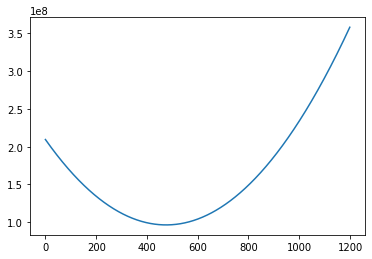

In [19]:
from matplotlib import pyplot

fuelCosts = []
for i in range(1200):
    fuelCosts.append(fuelCost(data,i))

pyplot.plot(fuelCosts)

In [87]:
# Puzzle 8!

def sfind(a,b):
    if len(b) > len(a):
        return -1
    for i in range(len(b)):
        if a.find(b[i]) == -1:
            return -1
    return 1

def shfind(a,b):
    if len(b) != len(a):
        return -1
    for i in range(len(b)):
        if a.find(b[i]) == -1:
            return -1
    return 1

def menha(a,b):
    men = ''
    for i in range(len(a)):
        if b.find(a[i]) == -1:
            men += a[i]
    return men

f = open('data/puzzle8.txt', 'r')
data = [s.split(' | ') for s in f.read().split('\n')]

tedad = 0
sum = 0

for i in range(len(data)):
    yek = ''
    haft = ''
    char = ''
    hasht = ''

    sefr = ''
    do = ''
    se = ''
    panj = ''
    shish = ''
    noh = ''

    data[i][0] = data[i][0].split(' ')
    data[i][1] = data[i][1].split(' ')

    # part 1:
    for n in range(4):
        if len(data[i][1][n]) == 2 or len(data[i][1][n]) == 3 or len(data[i][1][n]) == 4 or len(data[i][1][n]) == 7:
            tedad += 1
    
    # part 2:
    for n in range(10):
        if len(data[i][0][n]) == 2:
            yek = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 3:
            haft = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 4:
            char = data[i][0][n]
            break
    for n in range(10):
        if len(data[i][0][n]) == 7:
            hasht = data[i][0][n]
            break
    for n in range(10):
        if data[i][0][n] == yek or data[i][0][n] == haft or data[i][0][n] == char or data[i][0][n] == hasht:
            continue
        else:
            if len(data[i][0][n]) == 5:
                if sfind(data[i][0][n], yek) == 1:
                    se = data[i][0][n]
                else:
                    if sfind(data[i][0][n], menha(char, yek)) == 1:
                        panj = data[i][0][n]
                    else:
                        do = data[i][0][n]
            else:
                if sfind(data[i][0][n], yek) != 1:
                    shish = data[i][0][n]
                else:
                    if sfind(data[i][0][n], menha(char, yek)) == 1:
                        noh = data[i][0][n]
                    else:
                        sefr = data[i][0][n]
    for n in range(4):
        if shfind(data[i][1][n], yek) == 1:
            sum += 1 * (10**(3-n))
            data[i][1][n] = 1
        elif shfind(data[i][1][n], do) == 1:
            sum += 2 * (10**(3-n))
            data[i][1][n] = 2
        elif shfind(data[i][1][n], se) == 1:
            sum += 3 * (10**(3-n))
            data[i][1][n] = 3
        elif shfind(data[i][1][n], char) == 1:
            sum += 4 * (10**(3-n))
            data[i][1][n] = 4
        elif shfind(data[i][1][n], panj) == 1:
            sum += 5 * (10**(3-n))
            data[i][1][n] = 5
        elif shfind(data[i][1][n], shish) == 1:
            sum += 6 * (10**(3-n))
            data[i][1][n] = 6
        elif shfind(data[i][1][n], haft) == 1:
            sum += 7 * (10**(3-n))
            data[i][1][n] = 7
        elif shfind(data[i][1][n], hasht) == 1:
            sum += 8 * (10**(3-n))
            data[i][1][n] = 8
        elif shfind(data[i][1][n], noh) == 1:
            sum += 9 * (10**(3-n))
            data[i][1][n] = 9
        else:
            data[i][1][n] = 0

print(tedad)
print(sum)

504
1073431


In [146]:
# Puzzle 9!

def checkSurrounding(data, i, n):
    if i == 0 and n != 0 and n != 99:
        if data[i][n] < data[i][n-1] and data[i][n] < data[i][n+1] and data[i][n] < data[i+1][n]:
            return 1
        else:
            return 0
    elif i == 99 and n != 0 and n != 99:
        if data[i][n] < data[i][n-1] and data[i][n] < data[i][n+1] and data[i][n] < data[i-1][n]:
            return 1
        else:
            return 0
    elif n == 0 and i != 0 and i != 99:
        if data[i][n] < data[i-1][n] and data[i][n] < data[i+1][n] and data[i][n] < data[i][n+1]:
            return 1
        else:
            return 0
    elif n == 99 and n != 0 and i != 99:
        if data[i][n] < data[i-1][n] and data[i][n] < data[i+1][n] and data[i][n] < data[i][n-1]:
            return 1
        else:
            return 0
    elif i == 0 and n == 0:
        if data[i][n] < data[1][0] and data[i][n] < data[0][1]:
            return 1
        else:
            return 0
    elif i == 0 and n == 99:
        if data[i][n] < data[i+1][n] and data[i][n] < data[i][n-1]:
            return 1
        else:
            return 0
    elif i == 99 and n == 0:
        if data[i][n] < data[i-1][n] and data[i][n] < data[i][n+1]:
            return 1
        else:
            return 0
    elif i == 99 and n == 99:
        if data[i][n] < data[i-1][n] and data[i][n] < data[i][n-1]:
            return 1
        else:
            return 0
    else:
        if data[i][n] < data[i-1][n] and data[i][n] < data[i+1][n] and data[i][n] < data[i][n+1] and data[i][n] < data[i][n-1]:
            return 1
        else:
            return 0

# didnt quite work as intended :((
# def basinSizer(data, i, n):
#     size = [[i,n]]
#     for m in range(0,100):
#         for v in range(0, 100):
#             if i + m > 4 or n + v > 9:
#                 break
#             if data[i+m][n+v] == '-1':
#                 continue
#             if data[i+m][n+v] == '9' or data[i+m][n+v] < data[i+m-1][n+v-1]:
#                 break
#             size.append([i+m,n+v])
#             data[i+m][n+v] = '-1'
#         for v in range(0, 100):
#             if i + m > 4 or n - v < 0 or i+m-1 <0 or n-v+1 >9:
#                 break
#             if data[i+m][n-v] == '-1':
#                 continue
#             if data[i+m][n-v] == '9' or data[i+m][n-v] < data[i+m-1][n-v+1]:
#                 break
#             size.append([i+m,n-v])
#             data[i+m][n-v] = '-1'
#     for m in range(0, 100):
#         for v in range(0, 100):
#             if i - m < 0 or n + v > 9 or i-m+1 > 4 or n+v-1 <0:
#                 break
#             if data[i-m][n+v] == '-1':
#                 continue
#             if data[i-m][n+v] == '9' or data[i-m][n+v] < data[i-m+1][n+v-1]:
#                 break
#             size.append([i-m,n+v])
#             data[i-m][n+v] = '-1'
#         for v in range(0, 100):
#             if i - m < 0 or n - v < 0 or i-m+1 >4 or n-v+1 > 9:
#                 break
#             if data[i-m][n-v] == '-1':
#                 continue
#             if data[i-m][n-v] == '9' or data[i-m][n-v] < data[i-m+1][n-v+1]:
#                 break
#             size.append([i-m,n-v])
#             data[i-m][n-v] = '-1'
#     return size

def basinSizer(data, i, n, basinPoints):
    basinPoints.append([i,n])
    b = [i+1,n]
    c = [i-1,n]
    d = [i,n+1]
    e = [i,n-1]
    a = [b,c,d,e]
    for s in a:
        if s[0] > 99 or s[0] == -1 or s[1] > 99 or s[1] == -1:
            continue
        elif data[s[0]][s[1]] == '9':
            continue
        elif [s[0],s[1]] in basinPoints:
            continue
        else:
            basinSizer(data, s[0], s[1], basinPoints)

data = open('data\puzzle9.txt', 'r').read().split('\n')
data = [list(s) for s in data]

allBasins = []
risk = 0
for i in range(100):
    for n in range(100):
        basins = []
        if checkSurrounding(data, i, n) == 1:
            risk += checkSurrounding(data, i, n) * (int(data[i][n]) + 1)
            basinSizer(data, i, n, basins)
            allBasins.append(basins)
            
print('part 1 answer: ', risk)
basinSizes = [len(s) for s in allBasins]
basinSizes.sort()
x = len(basinSizes)
answer = basinSizes[x - 1] * basinSizes[x - 2] * basinSizes[x - 3]
print('part 2 answer: ', answer)

part 1 answer:  591
part 2 answer:  339537


In [187]:
# puzzle 10!

from copy import deepcopy

def corruptionChecker(data):
    for i in range(len(data)):
        if data[i] == ']' or data[i] == ')' or data[i] == '}' or data[i] == '>':
            n = 0
            for n in range(i):
                if (data[i] == ')' and data[i-n-1] == '(') or (data[i] == '}' and data[i-n-1] == '{') or (data[i] == ']' and data[i-n-1] == '[') or (data[i] == '>' and data[i-n-1] == '<'):
                    data[i] = 0
                    data[i-n-1] = 0
                elif data[i-n-1] != 0:
                    if data[i] == ')':
                        return 3
                    elif data[i] == ']':
                        return 57
                    elif data[i] == '}':
                        return 1197
                    elif data[i] == '>':
                        return 25137
        else:
            continue

data = open('data\puzzle10.txt', 'r').read().split('\n')
data = [list(s) for s in data]
totalSyntaxError = []
for s in data:
    totalSyntaxError.append(corruptionChecker(s))
answerP1 = 0
for s in totalSyntaxError:
    if s is not None:
        answerP1 += s
print('part 1 answer: ', answerP1)

dataP2 = deepcopy(data)
n = 0
for i in range(len(totalSyntaxError)):
    if totalSyntaxError[i] != None:
        dataP2.pop(i - n)
        n += 1
for s in dataP2:
    m = 0
    for i in range(len(s)):
        if s[i - m] == 0:
            s.pop(i - m)
            m += 1
scores = []
for s in dataP2:
    score = 0
    for i in range(len(s)):
        x = len(s)
        score *= 5
        if s[x-i-1] == '(':
            score += 1
        elif s[x-i-1] == '[':
            score += 2
        elif s[x-i-1] == '{':
            score += 3
        elif s[x-i-1] == '<':
            score += 4
    scores.append(score)
scores.sort()
print('Part 2 answer is: ', scores[int(len(scores) / 2)])

part 1 answer:  339537
Part 2 answer is:  2412013412


In [3]:
# puzzle 11!
# not working because of recursion depth

# def dumboOcto(data, i, n):
#     if data[i][n] == 9:
#         flash = 1
#         data[i][n] == 0
#         if i !=0 and i != 9 and n!= 0 and n!= 9:
#             neighboors = [[data[i-1][n-1],i-1,n-1],[data[i-1][n],i-1,n],
#                         [data[i-1][n+1],i-1,n+1],[data[i][n-1],i,n-1],
#                         [data[i][n+1],i,n+1],[data[i+1][n-1],i+1,n-1],
#                         [data[i+1][n],i+1,n],[data[i+1][n+1],i+1,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i == 0 and n == 0:
#             neighboors = [[data[i][n+1],i,n+1], [data[i+1][n],i+1,n], [data[i+1][n+1],i+1,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i ==0 and n == 9:
#             neighboors = [[data[i][n-1],i,n-1], [data[i+1][n-1],i+1,n-1], [data[i+1][n],i+1,n]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i == 9 and n == 0:
#             neighboors = [[data[i-1][n],i-1,n], [data[i-1][n+1],i-1,n+1], [data[i][n+1],i,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i == 9 and n == 9:
#             neighboors = [[data[i-1][n-1],i-1,n-1], [data[i-1][n],i-1,n], [data[i][n-1],i,n-1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i == 0:
#             neighboors = [[data[i][n-1],i,n-1], [data[i][n+1],i,n+1], [data[i+1][n-1],i+1,n-1],
#                         [data[i+1][n],i+1,n], [data[i+1][n+1],i+1,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if i == 9:
#             neighboors = [[data[i][n-1],i,n-1], [data[i][n+1],i,n+1], [data[i-1][n-1],i-1,n-1],
#                         [data[i-1][n],i-1,n], [data[i-1][n+1],i-1,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if n == 0:
#             neighboors = [[data[i-1][n],i-1,n], [data[i-1][n+1],i-1,n+1], [data[i][n+1],i,n+1],
#                         [data[i+1][n],i+1,n], [data[i+1][n+1],i+1,n+1]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#         if n == 9:
#             neighboors = [[data[i-1][n-1],i-1,n-1], [data[i-1][n],i-1,n], [data[i][n-1],i,n-1],
#                         [data[i+1][n-1],i+1,n-1], [data[i+1][n],i+1,n]]
#             for s in neighboors:
#                 s[0] += 1
#             for s in neighboors:
#                 if s[0] > 8:
#                     flash += dumboOcto(data, s[1], s[2])
#             return flash
#     else: return 0

# data = open('data\puzzle11.txt', 'r').read().split('\n')
# data = [list(s) for s in data]
# for i in range(len(data)):
#     for n in range(len(data[i])):
#         data[i][n] = int(data[i][n])
# flashes = 0
# for i in range(1):
#     for n in range(10):
#         for m in range(10):
#             data[n][m] += 1
#     for n in range(10):
#         for m in range(10):
#             flashes += dumboOcto(data, n, m)

# flashes

In [4]:
def neighboorYab(i, n):
    if i !=0 and i != 9 and n!= 0 and n!= 9:
        neighboors = [[i-1,n-1], [i-1,n], [i-1,n+1], [i,n-1],
                    [i,n+1],[i+1,n-1], [i+1,n],[i+1,n+1]]
        return neighboors
    if i == 0 and n == 0:
        neighboors = [[i,n+1], [i+1,n], [i+1,n+1]]
        return neighboors
    if i ==0 and n == 9:
        neighboors = [[i,n-1], [i+1,n-1], [i+1,n]]
        return neighboors
    if i == 9 and n == 0:
        neighboors = [[i-1,n], [i-1,n+1], [i,n+1]]
        return neighboors
    if i == 9 and n == 9:
        neighboors = [[i-1,n-1], [i-1,n], [i,n-1]]
        return neighboors
    if i == 0:
        neighboors = [[i,n-1], [i,n+1], [i+1,n-1], [i+1,n], [i+1,n+1]]
        return neighboors
    if i == 9:
        neighboors = [[i,n-1], [i,n+1], [i-1,n-1], [i-1,n], [i-1,n+1]]
        return neighboors
    if n == 0:
        neighboors = [[i-1,n], [i-1,n+1], [i,n+1], [i+1,n], [i+1,n+1]]
        return neighboors
    if n == 9:
        neighboors = [[i-1,n-1], [i-1,n], [i,n-1], [i+1,n-1], [i+1,n]]
        return neighboors

data = open('data\puzzle11.txt', 'r').read().split('\n')
data = [list(s) for s in data]
for i in range(len(data)):
    for n in range(len(data[i])):
        data[i][n] = int(data[i][n])
flashes = 0
x =[]
for m in range(1):
    for i in range(10):
        for n in range(10):
            data[i][n] += 1
    for i in range(10):
        for n in range(10):
            if data[i][n] == 9:
                data[i][n] = 0
                flashes += 1
                s = neighboorYab(i,n)

flashes

13

In [5]:
# puzzle 12

def startPath(data):
    path = []
    start = []
    for s in data:
        if s[0] == 'start':
            start.append(s[1])
        if s[1] == 'start':
            start.append(s[0])
    for s in start:
        path.append([s])
    for s in 
    pass

data = open('data\puzzle12.txt', 'r').read().split('\n')
data = [s.split('-') for s in data]
data

[['um', 'end'],
 ['pk', 'um'],
 ['FE', 'il'],
 ['ay', 'FE'],
 ['pk', 'start'],
 ['end', 'jt'],
 ['um', 'FE'],
 ['RO', 'il'],
 ['xc', 'ay'],
 ['il', 'end'],
 ['start', 'EZ'],
 ['pk', 'FE'],
 ['xc', 'start'],
 ['jt', 'FE'],
 ['EZ', 'um'],
 ['pk', 'xc'],
 ['xc', 'EZ'],
 ['pk', 'ay'],
 ['il', 'ay'],
 ['jt', 'EZ'],
 ['jt', 'om'],
 ['pk', 'EZ']]

In [7]:
for s in data:
    if s[0] == 'end' or s[1] == 'end':
        print(s)

['um', 'end']
['end', 'jt']
['il', 'end']


In [50]:
# Puzzle 13!
import numpy as np

def folder(Direction, Position, dotList):
    if Direction == 'x':
        newpage = dotList[:Position,:]
        folded = dotList[Position + 1:,:]
        for i in range(folded.shape[0]):
            for n in range(folded.shape[1]):
              if folded[i,n] == 1:
                  newpage[Position-i-1, n] = 1 
    if Direction == 'y':
        newpage = dotList[:,:Position]
        folded = dotList[:,Position + 1:]
        for i in range(folded.shape[0]):
            for n in range(folded.shape[1]):
              if folded[i,n] == 1:
                  newpage[i, Position-n-1] = 1 
    return newpage

def pageMaker(dots):
    max1 = dots[:,0].max()
    max2 = dots[:,1].max()
    page = np.zeros((max1 + 1,max2 + 1))
    for i in dots:
        page[i[0],i[1]] = 1
    return page

data = open('data\puzzle13.txt', 'r').read().split('\n\n')
dots = [x.split(',') for x in data[0].split('\n')]
for i in dots:
    i[0] = int(i[0])
    i[1] = int(i[1])
dots = np.array(dots)
page = pageMaker(dots)
folds = [x.split('=') for x in data[1].split('\n')]
for i in folds:
    i[0] = i[0].strip('fold along ')
    i[1] = int(i[1])
for i in folds:
    page = folder(i[0], i[1], page)
page.T

# page.T is the answer but reading it as is, is really hard :))
# I suggest copying the answer in notepad and something

array([[1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
   